# Name: Shay Samat
### Date: August 12th, 2023

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: 22.3 points per game  
- 2nd Team: 19.6 points per game  
- 3rd Team: 17.4 points per game  
- All-Star: 20.3 points per game  

**Question 2:** 2.8 Years  

**Question 3:** 

- Elite: 2 players.  
- All-Star: 1 players.  
- Starter: 17 players.  
- Rotation: 7 players.  
- Roster: 30 players.  
- Out of League: 16 players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** 28.8%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [1]:
import pandas as pd
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv('awards_data.csv')
player_data = pd.read_csv('player_stats.csv')
team_data = pd.read_csv('team_stats.csv')
rebounding_data = pd.read_csv('team_rebounding_data_22.csv')

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

First, need to filter the data for players that have played starting from 2007 through 2021. I am also going to perform some data cleaning for the columns we will not be using.

In [2]:
filtered_awards_data = awards[(awards['season'] >= 2007) & (awards['season'] <= 2021)]
filtered_awards_data = filtered_awards_data[['season', 'nbapersonid', 'All NBA First Team',
                                             'All NBA Second Team', 'All NBA Third Team', 'all_star_game']]
filtered_awards_data

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game
0,2007,708.0,1.0,0.0,0.0,True
1,2007,947.0,0.0,0.0,0.0,True
2,2007,948.0,0.0,0.0,0.0,NaN
3,2007,959.0,0.0,1.0,0.0,True
4,2007,977.0,1.0,0.0,0.0,True
...,...,...,...,...,...,...
4324,2015,1626170.0,NaN,NaN,NaN,NaN
4325,2015,1626202.0,NaN,NaN,NaN,NaN
4326,2015,1626273.0,NaN,NaN,NaN,NaN
4327,2018,1628971.0,NaN,NaN,NaN,NaN


We know that if a given player has made the All NBA team, it is represented by a 1, so we filter the data to only include people on the first, second, third teams and those who were in the All-Star Game, represented by a boolean.


In [3]:
total_awards_data = filtered_awards_data[(filtered_awards_data['All NBA First Team'] == 1) |
                                      (filtered_awards_data['All NBA Second Team'] == 1) |
                                      (filtered_awards_data['All NBA Third Team'] == 1) |
                                      (filtered_awards_data['all_star_game'] == 'TRUE')]
total_awards_data

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game
0,2007,708.0,1.0,0.0,0.0,True
3,2007,959.0,0.0,1.0,0.0,True
4,2007,977.0,1.0,0.0,0.0,True
6,2007,1495.0,0.0,1.0,0.0,True
7,2007,1503.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...
666,2021,1627783.0,0.0,0.0,1.0,NaN
668,2021,1628369.0,1.0,0.0,0.0,True
676,2021,1629027.0,0.0,0.0,1.0,True
677,2021,1629029.0,1.0,0.0,0.0,True


We now notice the difference in rows being reduced by approximately 4100 people! The current dataframe only contains people who have made All NBA First, Second, Third Team or taken part in the All Star Game. We are now going to merge the dataframe with the player_data dataframe, matching the NBA person ID, to get an accurate reading of the player stats that was achieved these awards.

In [4]:
merged_data = pd.merge(total_awards_data, player_data[['points', 'nbapersonid', 'player', 'games']], on='nbapersonid')
merged_data

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,points,player,games
0,2007,708.0,1.0,0.0,0.0,True,1337,Kevin Garnett,71
1,2007,708.0,1.0,0.0,0.0,True,899,Kevin Garnett,57
2,2007,708.0,1.0,0.0,0.0,True,990,Kevin Garnett,69
3,2007,708.0,1.0,0.0,0.0,True,1056,Kevin Garnett,71
4,2007,708.0,1.0,0.0,0.0,True,947,Kevin Garnett,60
...,...,...,...,...,...,...,...,...,...
2645,2021,1629027.0,0.0,0.0,1.0,True,1594,Trae Young,63
2646,2021,1629027.0,0.0,0.0,1.0,True,2155,Trae Young,76
2647,2021,1629630.0,0.0,1.0,0.0,True,1193,Ja Morant,67
2648,2021,1629630.0,0.0,1.0,0.0,True,1204,Ja Morant,63


In [5]:
merged_data['PPG'] = merged_data['points'] / merged_data['games']
merged_data

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,points,player,games,PPG
0,2007,708.0,1.0,0.0,0.0,True,1337,Kevin Garnett,71,18.830986
1,2007,708.0,1.0,0.0,0.0,True,899,Kevin Garnett,57,15.771930
2,2007,708.0,1.0,0.0,0.0,True,990,Kevin Garnett,69,14.347826
3,2007,708.0,1.0,0.0,0.0,True,1056,Kevin Garnett,71,14.873239
4,2007,708.0,1.0,0.0,0.0,True,947,Kevin Garnett,60,15.783333
...,...,...,...,...,...,...,...,...,...,...
2645,2021,1629027.0,0.0,0.0,1.0,True,1594,Trae Young,63,25.301587
2646,2021,1629027.0,0.0,0.0,1.0,True,2155,Trae Young,76,28.355263
2647,2021,1629630.0,0.0,1.0,0.0,True,1193,Ja Morant,67,17.805970
2648,2021,1629630.0,0.0,1.0,0.0,True,1204,Ja Morant,63,19.111111


In [6]:
first_team_data = merged_data[merged_data['All NBA First Team'] == 1]
avg_ppg_first_team = first_team_data['PPG'].mean()
avg_ppg_first_team

22.3096871795066

In [7]:
second_team_data = merged_data[merged_data['All NBA Second Team'] == 1]
avg_ppg_second_team = second_team_data['PPG'].mean()
avg_ppg_second_team


19.602453597125052

In [8]:
third_team_data = merged_data[merged_data['All NBA Third Team'] == 1]
avg_ppg_third_team = third_team_data['PPG'].mean()
avg_ppg_third_team

17.406737392538716

In [9]:
all_star_data = merged_data[merged_data['all_star_game'] == True]
avg_ppg_all_star_data = all_star_data['PPG'].mean()
avg_ppg_all_star_data

20.327917893218274

<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 22.3 points per game  
2nd Team: 19.6 points per game  
3rd Team: 17.4 points per game  
All-Star: 20.3 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



The filtered data I used earlier in the first part is valid to use here and a great starting point.

In [11]:
filtered_df = merged_data[merged_data[['All NBA First Team', 'All NBA Second Team', 'All NBA Third Team']].sum(axis=1) != 0]
filtered_df = filtered_df.drop(columns=['all_star_game'])
filtered_df

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,points,player,games,PPG
0,2007,708.0,1.0,0.0,0.0,1337,Kevin Garnett,71,18.830986
1,2007,708.0,1.0,0.0,0.0,899,Kevin Garnett,57,15.771930
2,2007,708.0,1.0,0.0,0.0,990,Kevin Garnett,69,14.347826
3,2007,708.0,1.0,0.0,0.0,1056,Kevin Garnett,71,14.873239
4,2007,708.0,1.0,0.0,0.0,947,Kevin Garnett,60,15.783333
...,...,...,...,...,...,...,...,...,...
2645,2021,1629027.0,0.0,0.0,1.0,1594,Trae Young,63,25.301587
2646,2021,1629027.0,0.0,0.0,1.0,2155,Trae Young,76,28.355263
2647,2021,1629630.0,0.0,1.0,0.0,1193,Ja Morant,67,17.805970
2648,2021,1629630.0,0.0,1.0,0.0,1204,Ja Morant,63,19.111111


Group the data by player and find their first All NBA selection year and calculate the number of years of experience for each player at their first All NBA selection

In [12]:
first_all_nba_year = filtered_df.groupby(['nbapersonid', 'player'])['season'].min()
first_all_nba_year_experience = merged_data.set_index(['nbapersonid', 'player'])['season'] - first_all_nba_year
first_all_nba_year_experience

nbapersonid  player          
406.0        Shaquille O'Neal    0
             Shaquille O'Neal    0
             Shaquille O'Neal    0
             Shaquille O'Neal    0
             Shaquille O'Neal    0
                                ..
1629029.0    Luka Dončić         2
             Luka Dončić         2
1629630.0    Ja Morant           0
             Ja Morant           0
             Ja Morant           0
Name: season, Length: 2650, dtype: int64

We only want to keep the latest season that would have the most updated count of the numbers of years experience it took for each player at their first All NBA selection, so we make a new dataframe dropping the duplicate names for each season because it is the same number of years of experience.

In [13]:
experience_df = first_all_nba_year_experience.reset_index()
unique_experience = experience_df.drop_duplicates(subset=['nbapersonid', 'player'], keep='last')
unique_experience

,nbapersonid,player,season
4,406.0,Shaquille O'Neal,0
14,708.0,Kevin Garnett,0
28,959.0,Steve Nash,2
82,977.0,Kobe Bryant,5
127,1495.0,Tim Duncan,7
...,...,...,...
2630,1628369.0,Jayson Tatum,2
2634,1629027.0,Trae Young,0
2637,1629029.0,Luka Doncic,2
2646,1629029.0,Luka Dončić,2


In [14]:
unique_experience['season'].mean()

2.824324324324324

Find the average years of experience in the league it takes for players to make their first All NBA Selection


<strong><span style="color:red">ANSWER 2:</span></strong>  

2.8 Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

Merge the Awards and Player data into a new dataframe containing all the information

In [15]:
total_data = pd.merge(player_data, awards, on=['nbapersonid', 'season'], how='left')
total_data

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,1630648,Jordan Schakel,2021,NaN,2021,1610612764,WAS,4,0,30,...,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8494,1630557,Corey Kispert,2021,15.0,2021,1610612764,WAS,77,36,1801,...,NaN,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8495,1628398,Kyle Kuzma,2017,27.0,2021,1610612764,WAS,66,66,2204,...,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8496,203526,Raul Neto,2013,47.0,2021,1610612764,WAS,70,19,1372,...,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use the given information in the question to adjust the games in order to be proportional to the rest of the games for accurate minutes and games played and started. I made functions in order to demonstrate how I created these new columns

In [16]:
adjusted_games = {
    2011: 82 / 66,
    2019: 82 / 72,
    2020: 82 / 72
}
def adjusted_games_func(row):
    return row['games'] * adjusted_games.get(row['season'], 1)

def adjusted_games_start_func(row):
    return row['games_start'] * adjusted_games.get(row['season'], 1)

def adjusted_minutes_func(row):
    return row['mins'] * adjusted_games.get(row['season'], 1)

total_data['adjusted_games'] = total_data.apply(adjusted_games_func, axis=1)
total_data['adjusted_minutes'] = total_data.apply(adjusted_minutes_func, axis=1)
total_data['adjusted_games_start'] = total_data.apply(adjusted_games_start_func, axis=1)

total_data

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk,adjusted_games,adjusted_minutes,adjusted_games_start
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,944.0,5.0
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,145.0,0.0
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,81.0,2873.0,81.0
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,865.0,6.0
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,402.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,1630648,Jordan Schakel,2021,NaN,2021,1610612764,WAS,4,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,30.0,0.0
8494,1630557,Corey Kispert,2021,15.0,2021,1610612764,WAS,77,36,1801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,1801.0,36.0
8495,1628398,Kyle Kuzma,2017,27.0,2021,1610612764,WAS,66,66,2204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,2204.0,66.0
8496,203526,Raul Neto,2013,47.0,2021,1610612764,WAS,70,19,1372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1372.0,19.0


According to the given information in the question, I used a function to classify each player (row) based on certain conditions to rate each single season outcome and save it as a new column.

In [34]:
def determine_outcome(row):
    if (row['All NBA First Team'] == 1 or row['All NBA Second Team'] == 1 or 
        row['All NBA Third Team'] == 1) or (row['Most Valuable Player_rk'] == 1 or 
        row['Defensive Player Of The Year_rk'] == 1):       
        return 'Elite'
    if row['all_star_game'] == True:
        return 'All-Star'
    if row['adjusted_games_start'] >= 41 or row['adjusted_minutes'] >= 2000:
        return 'Starter'
    if row['adjusted_minutes'] >= 1000:
        return 'Rotation'
    if row['adjusted_minutes'] >= 1:
        return 'Roster'
    return 'Out of the League'

total_data['season_outcome'] = total_data.apply(determine_outcome, axis=1)
total_data['season_outcome'].value_counts()

Roster      4613
Starter     1866
Rotation    1595
Elite        229
All-Star     195
Name: season_outcome, dtype: int64

To classify a career outcome, I tried to use the examples given as a guide, I gathered data for each player after their first 4 years in order to make a judgement on how they would be classified. I then applied these changes to a new 'career_outcome' column.

In [18]:
def categorize_career_outcome(group):
    outcomes = group.iloc[:, 4:].values.flatten()
    if (outcomes == 'Elite').sum() >= 2:
        return 'Elite'
    elif (outcomes == 'All-Star').sum() >= 2:
        return 'All-Star'
    elif (outcomes == 'Starter').sum() >= 2:
        return 'Starter'
    elif (outcomes == 'Rotation').sum() >= 2:
        return 'Rotation'
    elif (outcomes == 'Roster').sum() > 1:
        return 'Roster'
    else:
        return 'Out of League'

# Group by player and apply the career outcome categorization function
career_outcomes = total_data.groupby('player').apply(categorize_career_outcome)

# Join the career outcomes with the original player data
career_player_data = total_data.join(career_outcomes.rename('career_outcome'), on='player')

career_outcomes

player
A.J. Hammons          Out of League
A.J. Price                   Roster
Aaron Brooks               Rotation
Aaron Gordon                Starter
Aaron Gray                   Roster
                          ...      
Ziaire Williams       Out of League
Zion Williamson       Out of League
Zoran Dragic                 Roster
Zydrunas Ilgauskas          Starter
Zylan Cheatham               Roster
Length: 1723, dtype: object

Get value counts for each of the career outcomes for each player

In [19]:
career_player_data['career_outcome'].value_counts()

Starter          3330
Roster           2531
Rotation         1395
Elite             490
Out of League     490
All-Star          262
Name: career_outcome, dtype: int64

Filter the data to players only drafted in 2010 and get value counts.

In [20]:
draft_year_2010 = career_player_data[career_player_data['draftyear'] == 2010]
unique_players_2010 = draft_year_2010.drop_duplicates(subset=['nbapersonid'])
outcome_counts = unique_players_2010['career_outcome'].value_counts()
outcome_counts

Roster           30
Starter          17
Out of League    16
Rotation          7
Elite             2
All-Star          1
Name: career_outcome, dtype: int64

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 2 players.  
All-Star: 1 players.  
Starter: 17 players.  
Rotation: 7 players.  
Roster: 30 players.  
Out of League: 16 players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



In [21]:
# Note: Here as well as anywhere else, feel free to add as many code chunks as you'd like.

**SUMMARY OF MODEL**

 The implemented classification model utilizes a Linear Support Vector Machine (LinearSVM) to predict NBA players' career outcomes based on various features. The model is trained on data from players drafted before or in 2015 and evaluated on data from players drafted in 2018-2021. The ROC curve analysis shows the model's ability to distinguish different career outcomes, yielding a high AUC value, indicating good overall performance. Additionally, a bar plot illustrates feature importance, highlighting key attributes in predicting career outcomes. Lastly, for a selected group of players, the model predicts their career outcomes for the latest available year, providing insights into their potential trajectory. This comprehensive approach showcases the model's effectiveness in forecasting NBA players' career paths. Some strengths of my model is that by using SVM I was able to interpret which features had the greatest impact on predicting the model. I also have flexibility for instance, I can change which kernel to use and fine-tune the hyperparameters. Some weaknesses include the the class imbalance of the target variable, which made it harder for the model to learn and predict the correct outcome. If I had more time, I would like to address the class imbalance and see if I could correct this. I would also like to try other models as well, to see if it would yield a higher accuracy.

Import the machine learning tools such as sklearn and data visualization features such as matplotlib.

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, plot_precision_recall_curve

First I have to filter data for players drafted before or in 2015 for the training data, and drop categorical columns that would cause errors in the analysis. Set Y as the 'career_outcome' column because we want to predict how a player's career will turn out based on their performance in their first 4 years. Because Y is categorical, we need to use a label encoder. 

In [23]:
training_data = career_player_data[career_player_data['draftyear'] <= 2015]

X = training_data.drop(['player', 'season_outcome', 'team', 'career_outcome'], axis=1)
y = training_data['career_outcome']
X.fillna(X.mean(), inplace=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

After performing a train-test split on the data before 2015, I used a scaler to scale the data and fit an SVM model with a linear kernel.

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearSVC()
model.fit(X_train_scaled, y_train)

LinearSVC()

Gather data from players after 2018, that don't have enough data for a career outcome and use this dataframe to predict what these player's career outcomes will be after training it on players drafted before 2015 and use the same process above. Then I saved the predictions and use an inverse transform in order to decode the predicted outcomes in order to get the correct class for career outcomes.

In [25]:
prediction_data = career_player_data[career_player_data['draftyear'] >= 2018]
X_pred = prediction_data.drop(['player', 'season_outcome', 'team', 'career_outcome'], axis=1)
X_pred.fillna(X.mean(), inplace=True)
X_pred_scaled = scaler.transform(X_pred)

predictions = model.predict(X_pred_scaled)
predicted_outcomes = label_encoder.inverse_transform(predictions)
prediction_data['predicted_career_outcome'] = predicted_outcomes
prediction_data['career_outcome_encoded'] = label_encoder.transform(prediction_data['career_outcome'])

Get a classification report regarding the career outcome function and their predicted career outcome from the model

In [26]:
target_names = label_encoder.classes_
classification_rep = classification_report(prediction_data['career_outcome_encoded'], predictions, labels=np.arange(len(target_names)), target_names=target_names)
classification_rep

'               precision    recall  f1-score   support\n\n     All-Star       0.00      0.00      0.00         0\n        Elite       0.21      1.00      0.35         3\nOut of League       0.00      0.00      0.00       208\n       Roster       0.70      0.86      0.77       468\n     Rotation       0.35      0.29      0.32        99\n      Starter       0.36      0.77      0.49        94\n\n     accuracy                           0.58       872\n    macro avg       0.27      0.49      0.32       872\n weighted avg       0.46      0.58      0.50       872\n'

Visualize the data analysis by using a ROC-AUC curve to calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for different probability thresholds

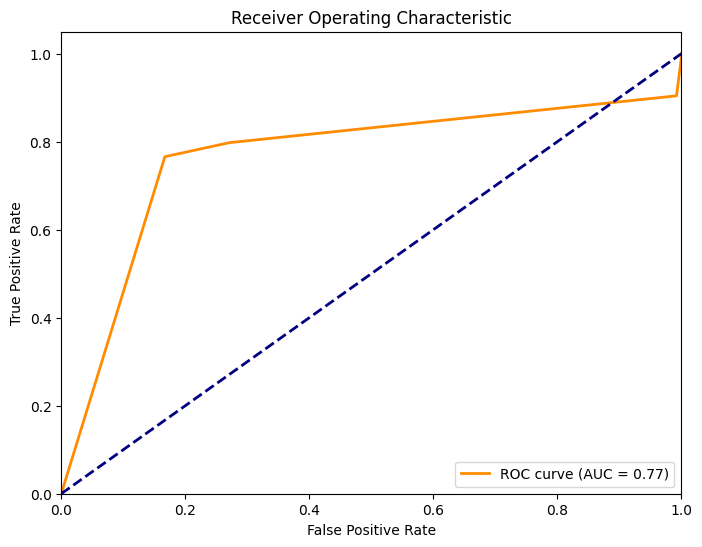

In [27]:
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(prediction_data['career_outcome_encoded'], predictions, pos_label=label_encoder.transform(['Starter'])[0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


I thought it would be interesting to see the feature importance for each feature in the model in terms of how important it was in predicting.

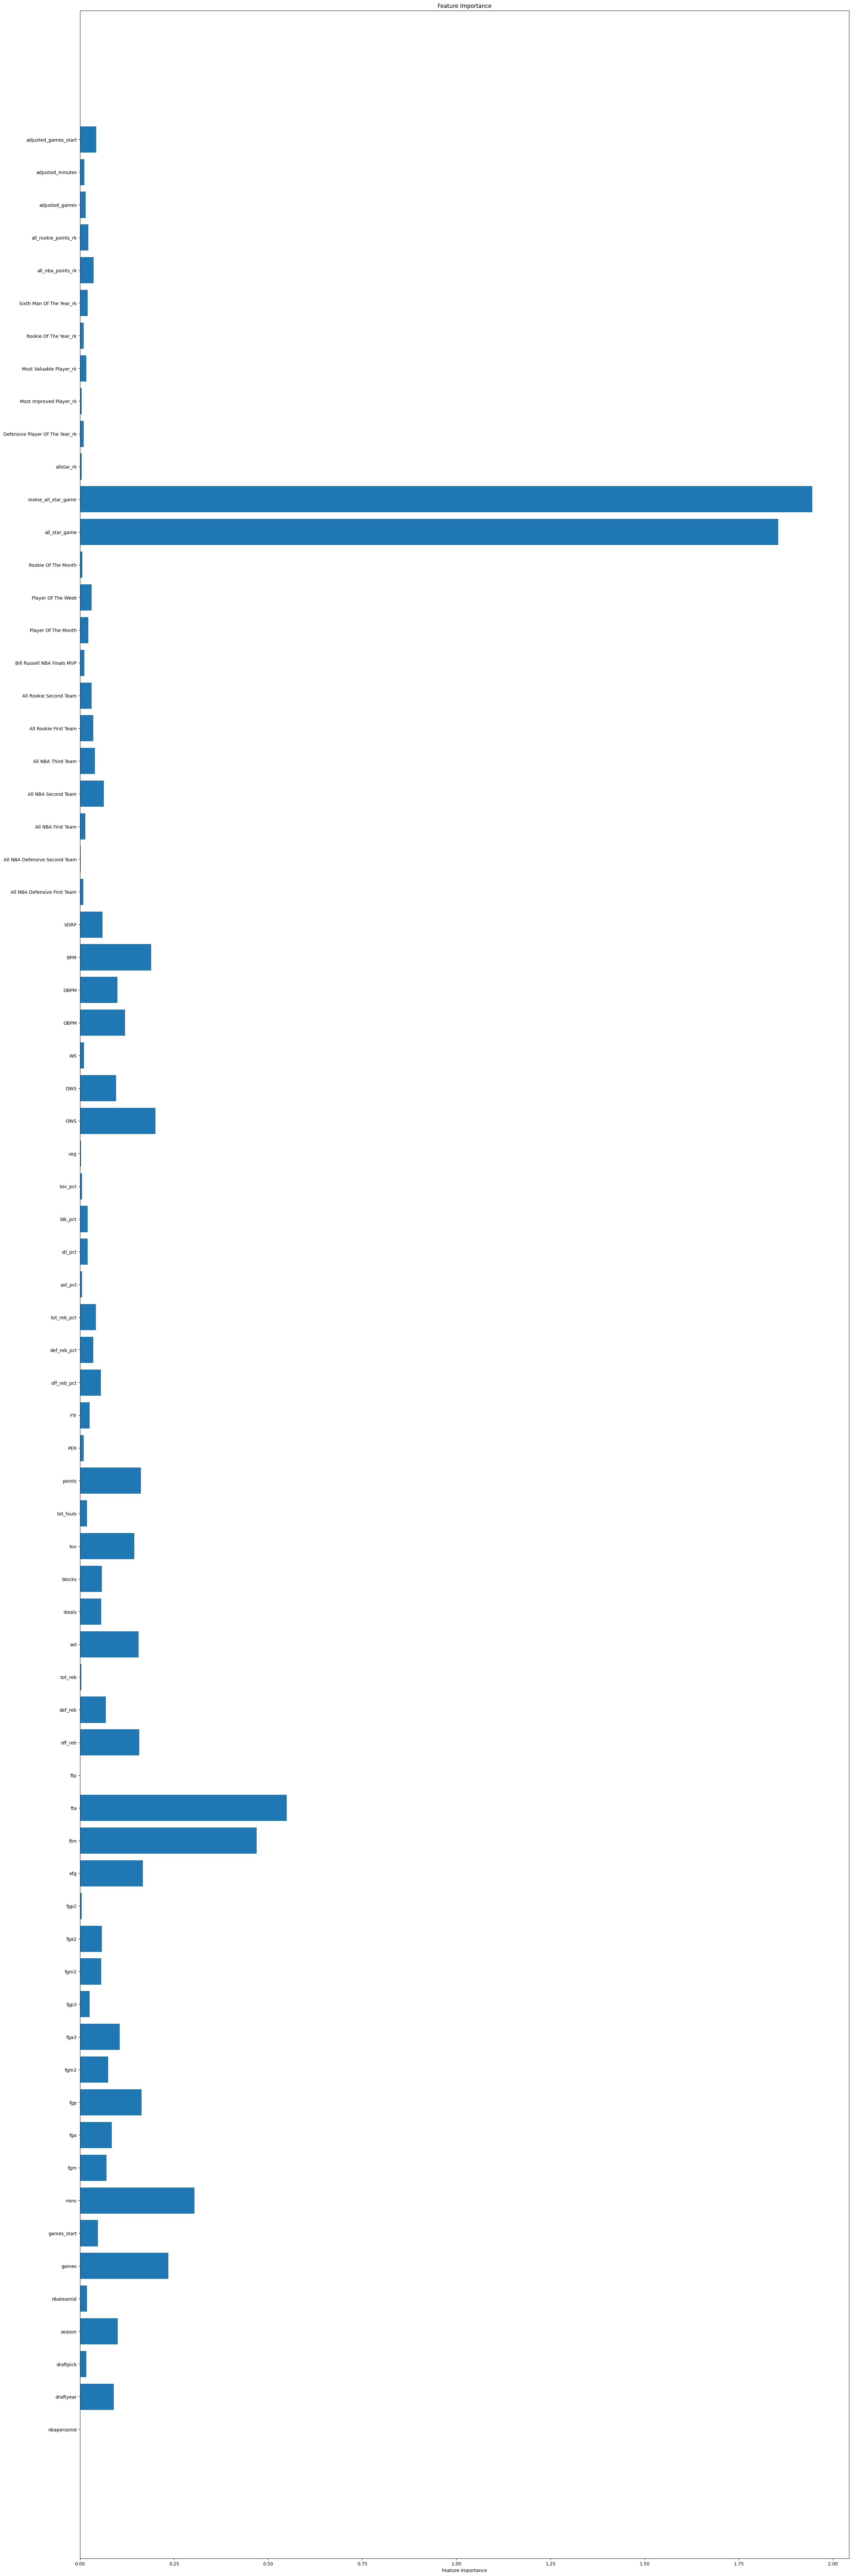

In [28]:
if hasattr(model, 'coef_'):
    plt.figure(figsize=(30, 100))
    feature_importance = abs(model.coef_[0])
    feature_names = X.columns
    plt.barh(feature_names, feature_importance)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance')
    plt.show()


The question asks us to get the predictions for players, Shai Gilgeous-Alexander,Zion Williamson, James Wiseman, and Josh Giddey. I then filtered the dataframe to only get these players and used the groupby function to get the latest season they had a prediction for and display the columns that would be the most important to glance at.

In [29]:
players_to_check = ['Shai Gilgeous-Alexander', 'Zion Williamson', 'James Wiseman', 'Josh Giddey']
players_predictions = prediction_data[prediction_data['player'].isin(players_to_check)]
latest_year_predictions = players_predictions.groupby('player', as_index=False)['season'].max()
latest_year_predictions = pd.merge(latest_year_predictions, players_predictions, on=['player', 'season'], how='left')

desired_columns = ['player', 'season', 'season_outcome', 'predicted_career_outcome']
latest_year_predictions[desired_columns]

,player,season,season_outcome,predicted_career_outcome
0,James Wiseman,2020,Roster,Starter
1,Josh Giddey,2021,Starter,Starter
2,Shai Gilgeous-Alexander,2021,Starter,Elite
3,Zion Williamson,2020,All-Star,Elite


In conclusion, it is clear the two most important features was if the player played in either thr rookie all star game or the all star game, to classify the player correctly. This gives us an idea that if a player makes the all star game, they could very well have an All-Star or Elite career. Looking at the players with a predicted career outcome, we see Wiseman and Giddey are predited to have careers being starters, and Gilgeous-Alexander and Williamson were predicted to have an elite career.

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

View the rebounding data

In [30]:
rebounding_data

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
0,BOS,PHI,2022-10-18,1,10,39,0.256410
1,PHI,BOS,2022-10-18,1,8,42,0.190476
2,GSW,LAL,2022-10-18,1,16,57,0.280702
3,LAL,GSW,2022-10-18,1,14,57,0.245614
4,ORL,DET,2022-10-19,1,13,47,0.276596
...,...,...,...,...,...,...,...
2455,LAC,PHX,2023-04-09,82,18,56,0.321429
2456,MEM,OKC,2023-04-09,82,12,55,0.218182
2457,POR,GSW,2023-04-09,82,11,61,0.180328
2458,SAC,DEN,2023-04-09,82,12,50,0.240000


Filter the rebounding data to OKC only for games that are 80 and below.

In [31]:
okc_data = rebounding_data[(rebounding_data["team"] == "OKC") & (rebounding_data["game_number"] <= 80)]
okc_data

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
19,OKC,MIN,2022-10-19,1,20,63,0.317460
63,OKC,DEN,2022-10-22,2,15,56,0.267857
81,OKC,MIN,2022-10-23,3,15,57,0.263158
107,OKC,LAC,2022-10-25,4,26,71,0.366197
135,OKC,LAC,2022-10-27,5,14,49,0.285714
...,...,...,...,...,...,...,...
2267,OKC,CHA,2023-03-28,76,11,49,0.224490
2287,OKC,DET,2023-03-29,77,14,49,0.285714
2297,OKC,IND,2023-03-31,78,13,49,0.265306
2342,OKC,PHX,2023-04-02,79,20,56,0.357143


Manipulate the code to get the average percentage of the offensive rebound and use this to predict what game 81 of the season offensive rebound percentage would be

In [32]:
average_oreb_pct = okc_data['oreb_pct'].mean()
predicted_oreb_pct_game_81 = average_oreb_pct * 100
predicted_oreb_pct_game_81

28.788606110616122

<strong><span style="color:red">ANSWER 1:</span></strong>  

28.8% 

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong>  

In order to change the model to better account for missing players, instead of using an averaging approach like we used in question 1, we could use machine learning model to better predict the offensive rebound percent for the next game. Particularly a regression model would be the best to use here as we are dealing with a continuous target variable. In this model, I would engineer features regaridng sensitivity scores for each player such as availability to see the impact it has on model prediction. This would yield us a better idea of the offensive rebounding percentage if a particular player with a high sensitivity is injured or unable to play in the next game.

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3:</span></strong>  

To build off of question 2, some other potential weaknesses would be ignoring the opponent's strengths/weaknesses regardng rebounding capabilities and there is no learning when you take the average. To fix these weaknesses, similar to my response in question 2, I would implement a machine learning model. By using a machine learning model, not only will the model learn on the training data, but can make more accurate predictions if we choose to analyze the opponents defensive data, as well as the sensivity scores of players on our team. With expanding our data to focus more on our own team, and the opponents team, we can make accurate predictions for an offensive rebound percentage using a regression machine learning model.